# **Heart Disease Prediction** 

https://www.kaggle.com/ronitf/heart-disease-uci/tasks

Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import warnings

Load The Data and Discribe It

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Feature Descriptions
    -age: Age in years
    -ca: Number of major blood vessels (0-3)
    -chol: Serum cholestrol in mg/dl
    -cp: Chest pain type
        Value 1: Typical angina
        Value 2: Atypical angina
        Value 3: Non-anginal pain
        Value 4: Asymptomatic
    -exang: Exercise induced angina (1 = yes; 0 = no)
    -fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = no)
    -oldpeak: ST depression induced by exercise relative to rest
    -restecg: Resting electrocardiographic results
        Value 0: Normal
        Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
    -sex: Sex (1 = male; 0 = female)
    -slope: The slope of the peak exercise ST segment
        Value 1: Upsloping
        Value 2: Flat
        Value 3: Downsloping
    -target: Target (0 = disease; 1 = no disease)
    -thal: Thalium stress test
        Value 3: normal
        Value 6: fixed defect
        Value 7: reversibe defect
    -thalach: Maximum heart rate achieved in bpm
    -trestbps: Resting blood pressure (in mmHg on admission to the hospital)


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


-Check for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


-Check for duplicates

In [15]:
df[df.duplicated()].shape

(0, 14)

In [16]:
# drop dublicates
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [17]:
sum(df.duplicated())

0

-Data Visulization

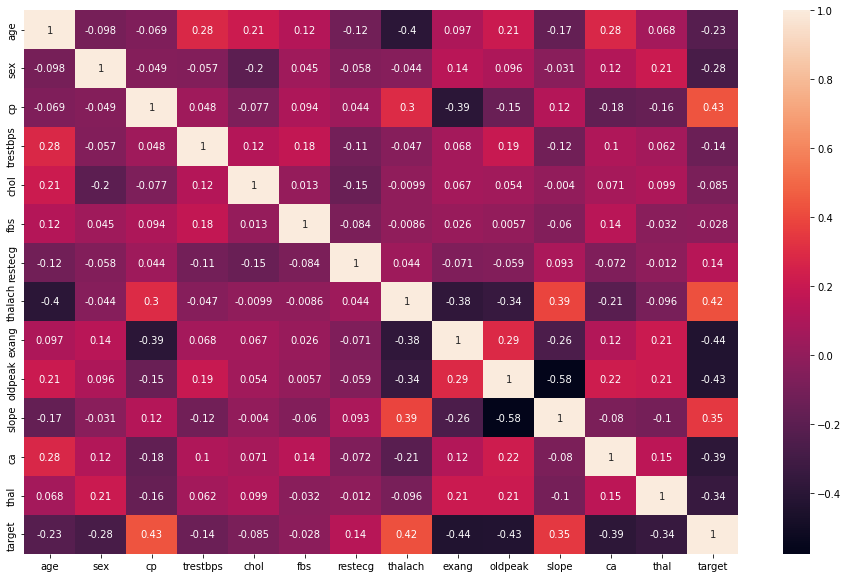

In [5]:
plt.figure(figsize = (16,10))

sns.heatmap(data=df.corr() ,annot=True)
plt.show()

# Observed

The characteristics that most affect the target are: Chest pain(cp) , maximum heart rate(thalach), slope (ST).

positive correlation between : Age vs trestbps , Age vs ca , Age vs chol , Age vs oldpeak , chol vs trestbps .

    -Graph show that as age increase , value of blood presure increase
    -Graph show that as age increase , value of oldpeak increase (ST depression)
    -Graph show that as age increase , value of ca increase
    -Graph show that as age increase , value of cholestrol  increase
    -Graph show that as cholestrol increase , value of blood presure increase.
    
Negative correlation between : age vs thalach , thalach vs oldpeak . 

    -Graph show that as age increase Maximum heart rate decrease
    -Graph show that as Maximum heart rate increase oldpeak decrease
 

In [6]:
x = df.drop('target',axis = 1)
y = df['target']

1    165
0    138
Name: target, dtype: int64


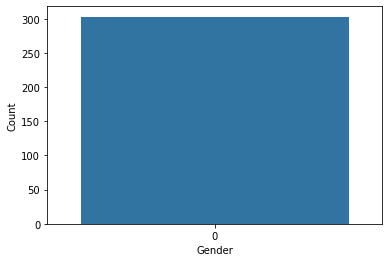

In [7]:
count = df.target.value_counts()
print(count)
sns.countplot(y)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
warnings.filterwarnings("ignore")

In [8]:
print('Percentage of patience without heart problems :'+str(y.where(y==0).count()*100/303))
print('Precentage of patience with heart problems :'+str(y.where(y==1).count()*100/303))

Percentage of patience without heart problems :45.54455445544554
Precentage of patience with heart problems :54.45544554455446


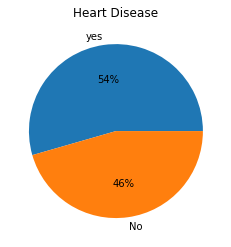

In [9]:
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

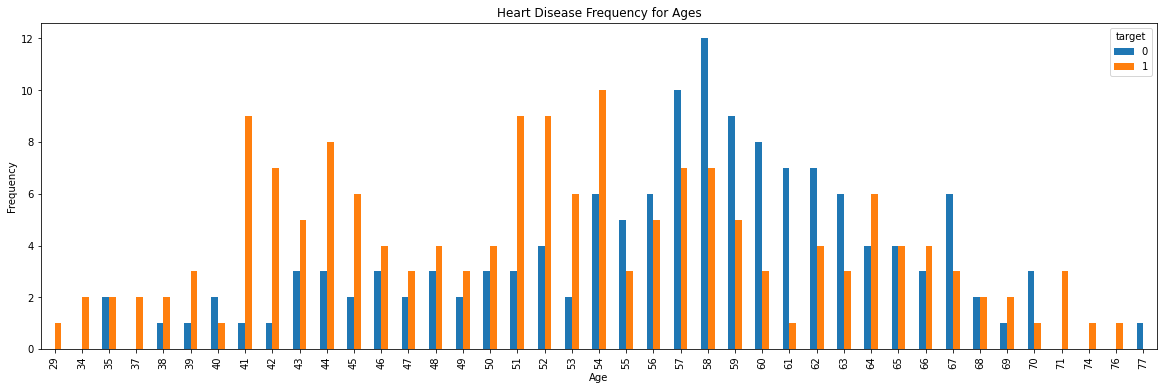

In [10]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Observed That :

-Most people have heart disease between Age [41 : 46] , [51 : 59].

-Most people have No heart disease between Age [54 : 67].


In [11]:
df['sex'].unique()

array([1, 0], dtype=int64)

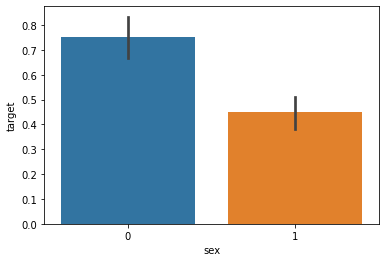

In [12]:

df['sex'] = df['sex']
sns.barplot(x=df['sex'],y=df['target'],data=df)
plt.show()

The female is the most affected by the disease

# Some modifications to the names of the features

In [14]:
df['sex']=df['sex'].replace([1,0], ['Male', 'Female'])
df['target']=df['target'].replace([0,1], ['Hale', 'Injured'])
df['slope']=df['slope'].replace([0,1,2], ['Upsloping','Flat','Down-sloping'])
df['restecg']=df['restecg'].replace([0,1,2], ['Normal', 'Abnormality','Hypertrophy'])
df['exang']=df['exang'].replace([1,0], ['Yes', 'No'])
df['fbs']=df['fbs'].replace([1,0], ['Yes', 'No'])
df['thal']=df['thal'].replace([1,2,3], ['Normal', 'Fixed Defect','Reversible defect'])
df['cp']=df['cp'].replace([0,1,2,3], ['Typical angina', 'Atypical angina','Non-anginal pain','Asymptomatic pain'])

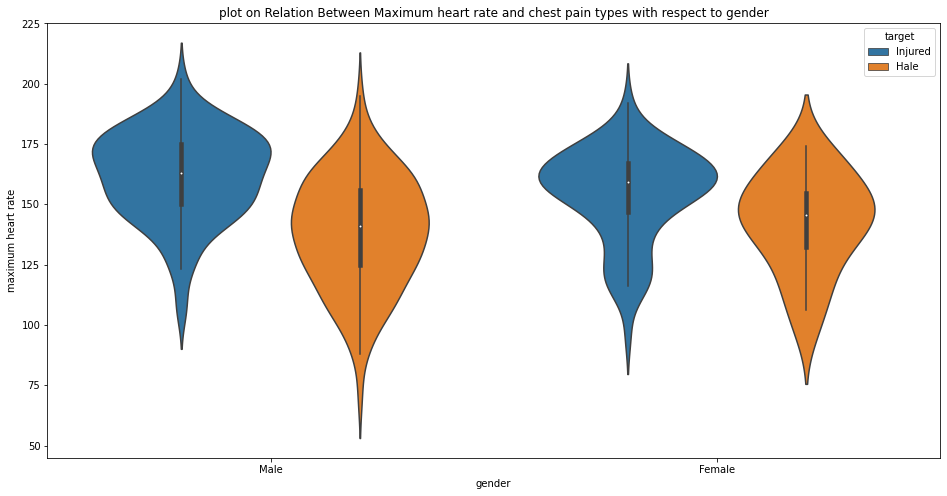

In [15]:
plt.figure(figsize= (16,8))
sns.violinplot(x="sex", y="thalach",hue="target", data=df,
               cmap =["BuPy"])
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and chest pain types with respect to gender")
plt.show()

# Observed That:

- Female that are have No heart disease max heart rate foucse in region [130 : 155]
- Female that are have heart disease max heart rate foucse in region [160 : 175]

- Male that are have No heart disease max heart rate foucse in region [125 : 160]
- Male that are have heart disease max heart rate foucse in region [160 : 175] #are mostly 

In [16]:
df['cp'].unique()

array(['Asymptomatic pain', 'Non-anginal pain', 'Atypical angina',
       'Typical angina'], dtype=object)

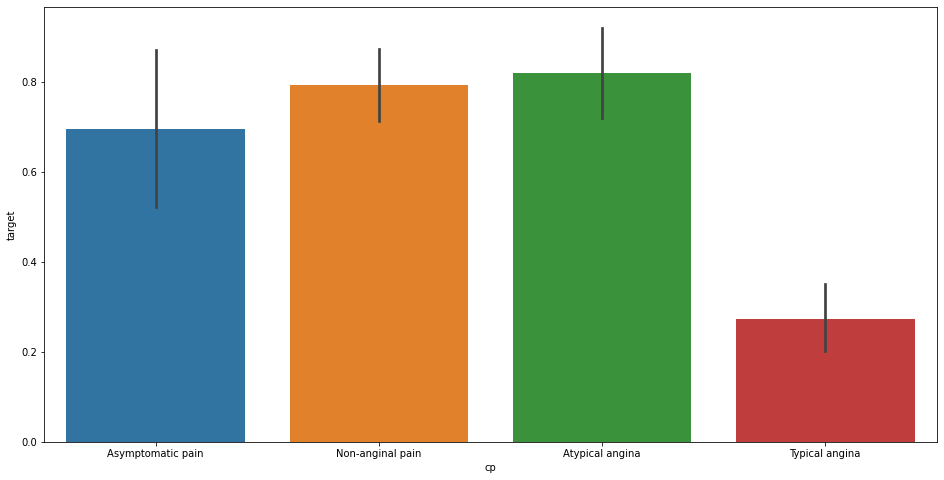

In [17]:

plt.figure(figsize=(16,8))
sns.barplot(x=df['cp'],y=y)
plt.show()

# Observed That :
 -People most at risk of heart disease are those who have atypical angina & Non-anginal pain.
 
 -People less at risk of heart disease are those who have Typical angina

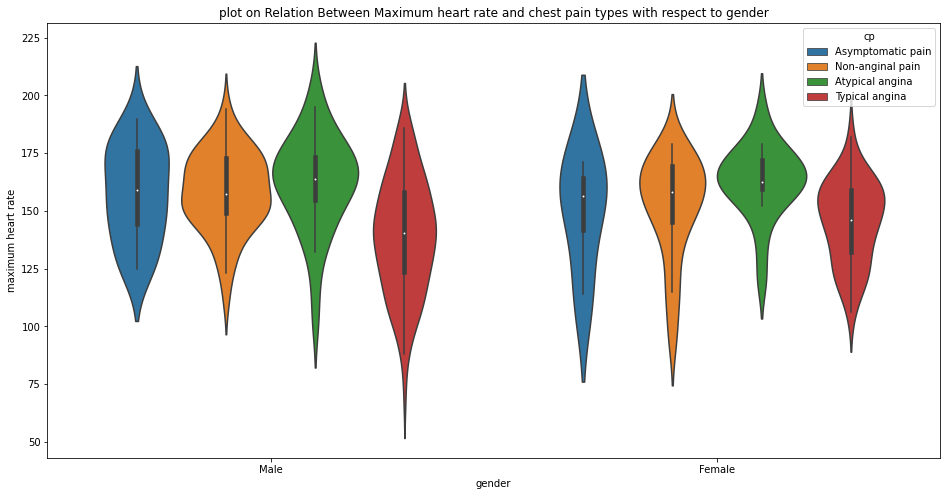

In [18]:
plt.figure(figsize= (16,8))
sns.violinplot(x="sex", y="thalach",hue="cp", data=df,
               cmap =["BuPy"]);
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and chest pain types with respect to gender")
plt.show()

# Observed That:

-Males with angina pectoris problems (atypical angina & Non-anginal pain & Asymptomatic pain).

    -max heart rate very dense in period [150 : 175] and the most kind of these three is  (Non-anginal pain).
    
-Males with typical angina pectoris have a lower heart rate between [125 : 155]

-Females with angina pectoris problems (atypical angina & Non-anginal pain & Asymptomatic pain).

    -max heart rate very dense in period [140 : 165] and the most kind of these three is  (atypical angina).
    
-Females with typical angina pectoris have a lower heart rate between [125 : 150]


In [19]:
df['restecg'].unique()

array(['Normal', 'Abnormality', 'Hypertrophy'], dtype=object)

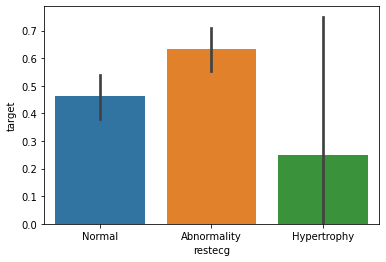

In [20]:
sns.barplot(x=df['restecg'],y=y)
plt.show()

-People who are most likely to get heart disease are people who have Abnormality (ST)


-People who are less likely to get heart disease are people who have Hypertrophy (ST)


In [21]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [22]:
df['thalach'].median()

153.0

In [23]:
df['slope'].unique()

array(['Upsloping', 'Down-sloping', 'Flat'], dtype=object)

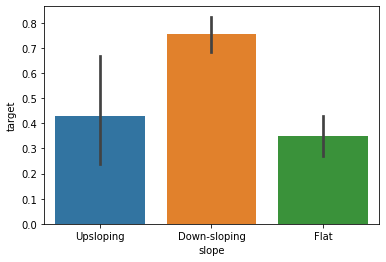

In [24]:
sns.barplot(x=df['slope'],y=y)
plt.show()

-People who are most likely to get heart disease are people who have Down-sloping

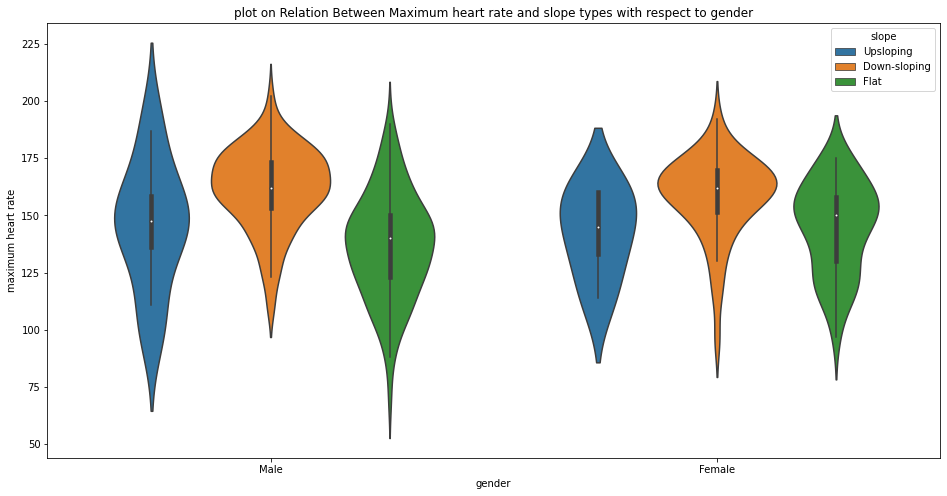

In [25]:
plt.figure(figsize= (16,8))
sns.violinplot(x="sex", y="thalach",hue="slope", data=df,
               cmap =["BuPy"]);
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and slope types with respect to gender")
plt.show()

# Observed That :

-Male that having Unsloping slop max heart are dense in interval [135 : 155].

-Male that having Down-sloping slop max heart are dense in interval [155 : 175].

-Male that having Flat slop max heart are dense in interval [125 : 150].

-Female that having Unsloping slop max heart are dense in interval [135 : 155].

-Female that having Down-sloping slop max heart are dense in interval [155 : 165].

-Female that having Flat slop max heart are dense in interval [125 : 155].

In [26]:
df['chol'].median()

240.0

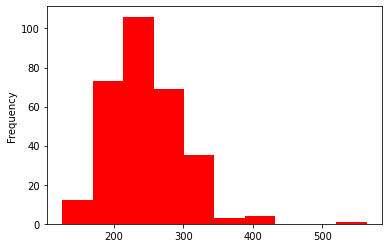

In [27]:
df['chol'].plot.hist(bins = 10, color = 'red')
plt.show()

 Most Chol Frequancly from [220 : 260]

# Now let's Split the data and do some Preprocessing 

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.3)

In [29]:
x_test.shape

(91, 13)

In [30]:
x_train.shape

(212, 13)

In [31]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(x_train)

PolynomialFeatures()

In [33]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler().fit(X=x_train)
scl.scale_

array([ 9.15364067,  0.46492783,  1.00145631, 17.46190993, 55.30796555,
        0.36253307,  0.53539294, 20.64770439,  0.46492783,  1.14733699,
        0.61226342,  1.00629914,  0.63017173])

In [34]:
# This function plots the confusion matrices given y_i, y_i_hat.
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Now LogisticRegression Using Hyperparameter tuning 

In [35]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score
from sklearn import metrics
  
params = {"C" : np.arange(0.1,1),"max_iter" : np.arange(1000,5000,100),"penalty" : ["l1","l2"]}
classifier = LogisticRegression()
model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)
model.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.1]),
                         'max_iter': array([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
       2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100,
       3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200,
       4300, 4400, 4500, 4600, 4700, 4800, 4900]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=10)

In [36]:
model.best_estimator_

LogisticRegression(C=0.1, max_iter=1000)

Accuarcy in train : 0.8490566037735849
Accuarcy in test : 0.8461538461538461
Precision in train : 0.8253968253968254
Precision in test : 0.8490566037735849
Recall  in train: 0.9122807017543859
Recall  inu test: 0.8823529411764706
log loss 5.313728201188915
CVaccuracy in train: 79.25803% (2.18659%)
CVaccuracy in test: 84.67836% (6.25102%)


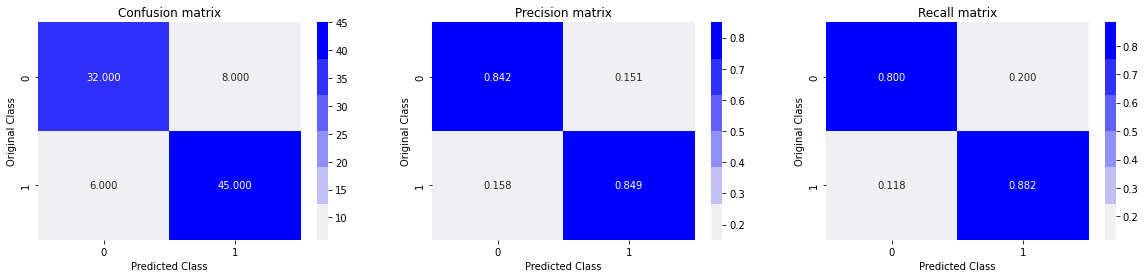

In [37]:
model = LogisticRegression(C=0.1,max_iter=1000)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)

print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train,classifier.predict(x_train)))
print('Recall  inu test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

accuracy_score(y_train,classifier.predict(x_train))

from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 5, scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

In [38]:
classifier.coef_

array([[ 0.01761222, -1.39053975,  0.84918285, -0.02153989, -0.00501572,
         0.12884128,  0.5881792 ,  0.03499454, -0.65331882, -0.31251362,
         0.45654882, -0.92001304, -0.79494688]])

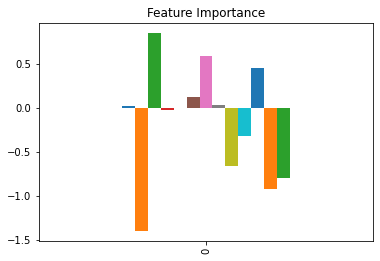

In [39]:
features = dict(zip(df.columns.values, list(classifier.coef_[0])))

feature = pd.DataFrame(features, index=[0])
feature.plot.bar(title="Feature Importance", legend=False);

# Now Let's Try SVM Using Hyperparameter tuning 

In [40]:
from sklearn import svm 

params = {
    "kernel" : ["linear","poly","rbf","sigmoid"],
    "degree": np.arange(1,15,2),
    "C"     :np.arange(0.1,1),
    "max_iter" : np.arange(1000,51000,1000)
}
classifier = svm.SVC()
model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)
model.fit(x_train,y_train)


Fitting 10 folds for each of 1400 candidates, totalling 14000 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.1]),
                         'degree': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
       19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
       28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000,
       37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000,
       46000, 47000, 48000, 49000, 50000])},
             scoring='accuracy', verbose=10)

In [41]:
model.best_estimator_

SVC(C=0.1, degree=1, kernel='linear', max_iter=50000)

Accuarcy in train : 0.8443396226415094
Accuarcy in test : 0.8461538461538461
Precision in train : 0.8045112781954887
Precision in test : 0.8490566037735849
Recall  in train: 0.9385964912280702
Recall  in test: 0.8823529411764706
hinge loss 0.5934065934065934
CVaccuracy in train: 61.79402% (6.41616%)
CVaccuracy in test: 64.79532% (3.07560%)


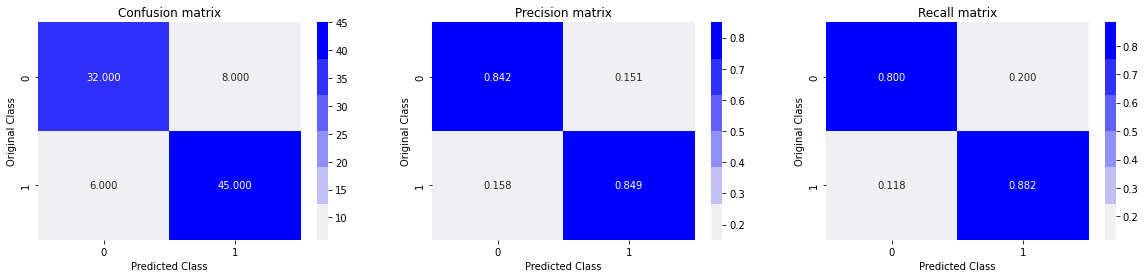

In [42]:
model = svm.SVC(C=0.1, degree=1, kernel='linear', max_iter=50000)
model.fit(x_train,y_train)
prediction = model.predict(x_test)


print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train,model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('hinge loss' , metrics.hinge_loss(y_test, prediction))

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 5,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# KNN try to find best K with minimum error

Minimum error:- 0.26373626373626374 at K = 25


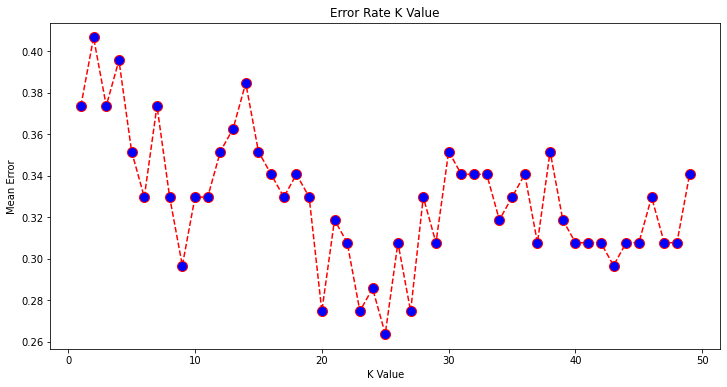

In [43]:
from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Accuarcy in train : 0.6792452830188679
Accuarcy in test : 0.7362637362637363
Precision in train : 0.6742424242424242
Precision in test : 0.7362637362637363
Recall  in train: 0.7807017543859649
Recall  in test: 0.7843137254901961
log loss 9.109242068620318
Accuracy: 63.65801% (10.37266%)
CVaccuracy in test: 70.44444% (8.01542%)


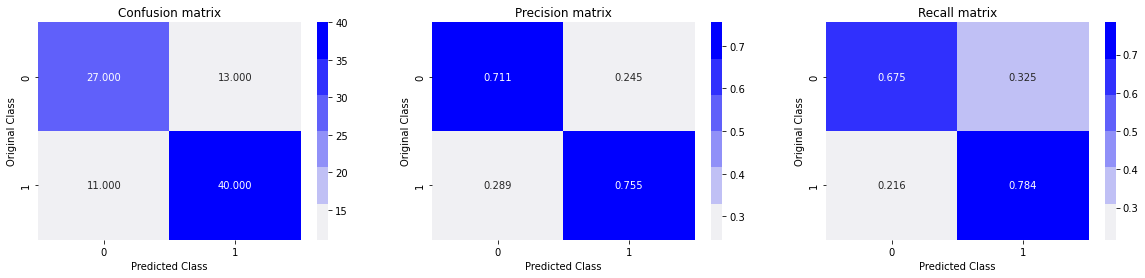

In [44]:
classifier = KNeighborsClassifier(n_neighbors=25,)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)

print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))
print('Precision in test :' ,metrics.accuracy_score(y_test,prediction))

print('Recall  in train:', recall_score(y_train,classifier.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# DecisionTree Using Hyperparameter tuning 

In [45]:
from sklearn.tree import DecisionTreeClassifier
        
classifier = DecisionTreeClassifier()

params = {
    "max_depth"    :np.arange(1,15,1),
    "criterion"    : ["gini","entropy"],
    "max_features" :np.arange(0.1,1)
    
}

model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)

model.fit(x_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([0.1])},
             scoring='accuracy', verbose=10)

In [46]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=0.1)

Accuarcy in train : 0.9858490566037735
Accuarcy in test : 0.8021978021978022
Precision in train : 0.9826086956521739
Precision in test : 0.8235294117647058
Recall  in train: 0.9912280701754386
Recall  in test: 0.8235294117647058
Accuracy: 73.22511% (13.09409%)
CVaccuracy in test: 72.55556% (10.11111%)


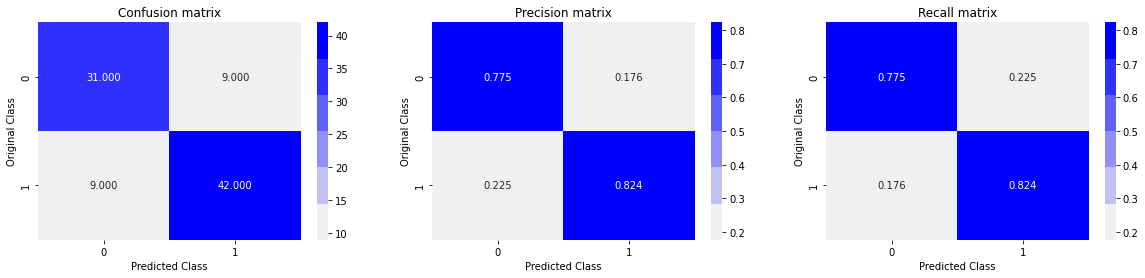

In [47]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=0.1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train,model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# RandomForst Using Hyperparameter tuning 

In [48]:
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
start = datetime.now()

classifier = ensemble.RandomForestClassifier()

param_grid = {
    "n_estimators":np.arange(100,1100,100),
    "max_depth":np.arange(1,20,3),
    "criterion":['gini', 'entropy'],
    "max_features" : np.arange(0.1,1)
}

model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid = param_grid,
    scoring='accuracy',
    verbose=10,
    cv=10,
    n_jobs=1)

model.fit(x_train,y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
[CV 1/10; 1/140] START criterion=gini, max_depth=1, max_features=0.1, n_estimators=100
[CV 1/10; 1/140] END criterion=gini, max_depth=1, max_features=0.1, n_estimators=100;, score=0.818 total time=   0.0s
[CV 2/10; 1/140] START criterion=gini, max_depth=1, max_features=0.1, n_estimators=100
[CV 2/10; 1/140] END criterion=gini, max_depth=1, max_features=0.1, n_estimators=100;, score=0.864 total time=   0.0s
[CV 3/10; 1/140] START criterion=gini, max_depth=1, max_features=0.1, n_estimators=100
[CV 3/10; 1/140] END criterion=gini, max_depth=1, max_features=0.1, n_estimators=100;, score=0.810 total time=   0.0s
[CV 4/10; 1/140] START criterion=gini, max_depth=1, max_features=0.1, n_estimators=100
[CV 4/10; 1/140] END criterion=gini, max_depth=1, max_features=0.1, n_estimators=100;, score=0.857 total time=   0.0s
[CV 5/10; 1/140] START criterion=gini, max_depth=1, max_features=0.1, n_estimators=100
[CV 5/10; 1/140] END criteri

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  4,  7, 10, 13, 16, 19]),
                         'max_features': array([0.1]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy', verbose=10)

In [49]:
model.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.1, n_estimators=200)

Accuarcy in train : 0.9858490566037735
Accuarcy in test : 0.8461538461538461
Precision in train : 0.9743589743589743
Precision in test : 0.8627450980392157
Recall  in train: 1.0
Recall  in test: 0.8627450980392157
log loss 5.313719414403966
Accuracy: 81.21212% (9.66871%)
CVaccuracy in test: 82.44444% (8.80236%)


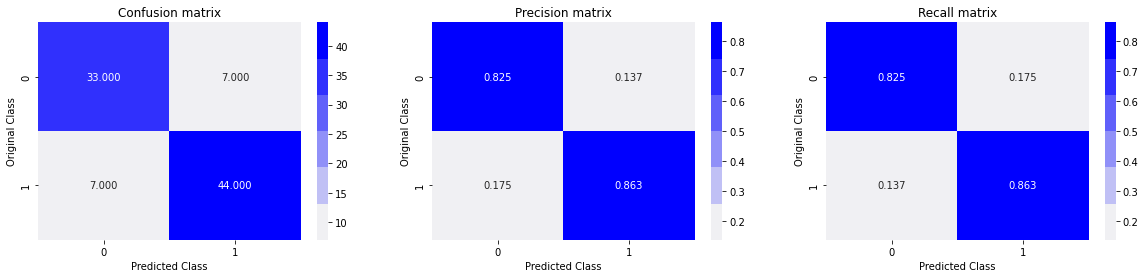

In [50]:
model = ensemble.RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.1,n_estimators=200)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))


print('Recall  in train:', recall_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))


results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# RandomForst Using Pipeline With StanderScaler

Accuarcy in train : 0.9905660377358491
Accuarcy in test : 0.8461538461538461
Precision in train : 0.9827586206896551
Precision in test : 0.8627450980392157
Recall  in train: 1.0
Recall  in test: 0.8627450980392157
log loss 5.313719414403966
CVaccuracy in train: 79.78355% (11.23383%)
CVaccuracy in test: 83.44444% (9.03286%)


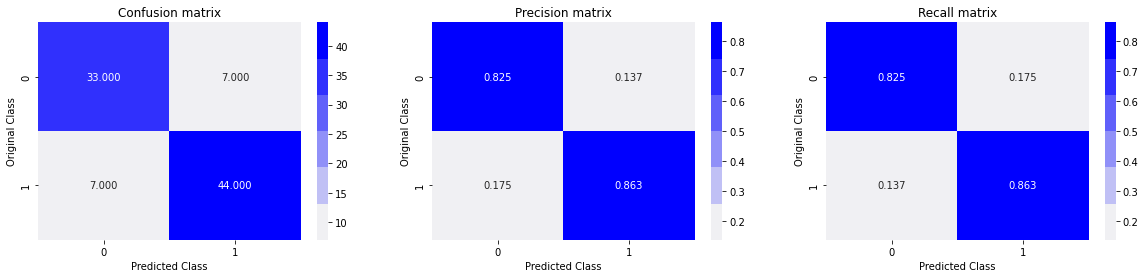

In [52]:
model = ensemble.RandomForestClassifier(criterion="entropy",max_depth=8,max_features=0.15014,n_estimators=200)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))


results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# ExtraTrees Using Hyperparameter tuning 

In [53]:
classifier = ExtraTreesClassifier()

N_estimators = np.arange(100,1100,100)
Max_depth = np.arange(1,16,1)
Criterion = ["gini","entropy"]
Max_features = np.arange(0.1,1)
params = dict(max_depth = Max_depth,n_estimators = N_estimators,criterion = Criterion,max_features = Max_features)
model = model_selection.GridSearchCV(

    estimator= classifier,
    param_grid=params,
    cv = 10,
    verbose = 10,
    n_jobs=-1,
    scoring="accuracy"
)
model.fit(x_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'max_features': array([0.1]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy', verbose=10)

In [55]:
model.best_estimator_

ExtraTreesClassifier(max_depth=12, max_features=0.1, n_estimators=600)

Accuracy in train:  1.0
Accuarcy in test :  0.8571428571428571
Precision in train : 1.0
Precision in test : 0.88
Recall  in train : 1.0
Recall  in test: 0.8627450980392157
log loss 4.934163634268352


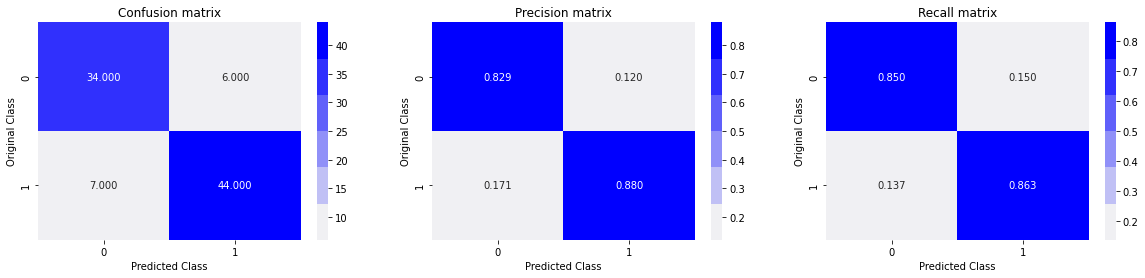

CVaccuracy in train: 81.60576% (3.73816%)
CVaccuracy in test: 82.39766% (8.91770%)


In [61]:
model = ExtraTreesClassifier( max_depth=12, n_estimators=600,max_features=0.1)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('Accuracy in train: ',metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test : ',metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train :', recall_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

plot_confusion_matrix(y_test,prediction)

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 5,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))





# ExtraTrees Using  Optuna  This is Best Accuracy

Accuarcy in train : 0.9764150943396226
Accuarcy in test : 0.8571428571428571
Precision in train : 0.957983193277311
Precision in test : 0.88
Recall  in train: 1.0
Recall  in test: 0.8627450980392157
log loss 4.934163634268352
CVaccuracy in train: 82.54707% (5.28036%)
CVaccuracy in test: 86.84211% (5.57246%)


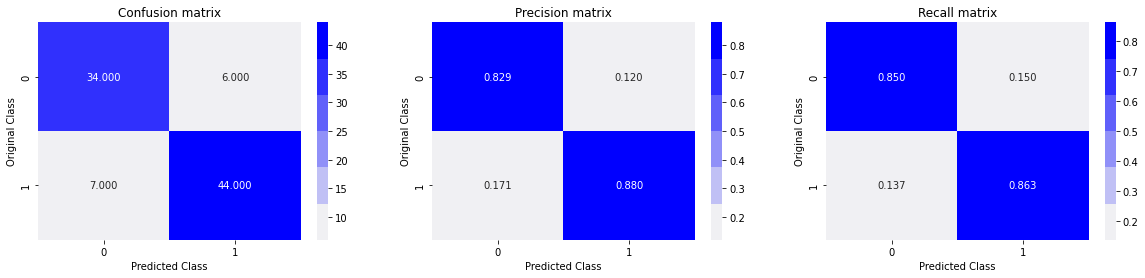

In [62]:
classifier = ensemble.ExtraTreesClassifier(criterion='gini',n_estimators=750,max_depth=9,max_features= 0.04013903248998978,n_jobs=-1)

classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,classifier.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, classifier.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train, classifier.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 5,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# XGB Using Hyperparameter tuning 

In [84]:
classifier =  xgb.XGBClassifier()
params = {
            "n_estimators":np.arange(100,1100,100),
            "max_depth":[1,14,2],
            "learning_rate":[0.1,0.2,0.3,0.4,0.5],
            "alpha" : np.arange(0.1,1),
            "gama"  : np.arange(0.1,1),
            "verbosity" : [0]
}
model = model_selection.GridSearchCV(estimator=classifier,param_grid = params,cv=10,scoring="accuracy",verbose=10,n_jobs=-1)
model.fit(x_train,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': array([0.1]), 'gama': array([0.1]),
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 14, 2],
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                         'verbosity': [0]},
             scoring='accuracy', verbose=10)

In [85]:
model.best_estimator_

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gama=0.1, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

Accuarcy in train : 0.8443396226415094
Accuarcy in test : 0.8901098901098901
Precision in train : 0.824
Precision in test : 0.9019607843137255
Recall  in train: 0.9035087719298246
Recall  in test: 0.9019607843137255
log loss 3.7955138674314046
CVaccuracy in train: 79.76190% (9.35568%)
CVaccuracy in test: 82.44444% (11.26340%)


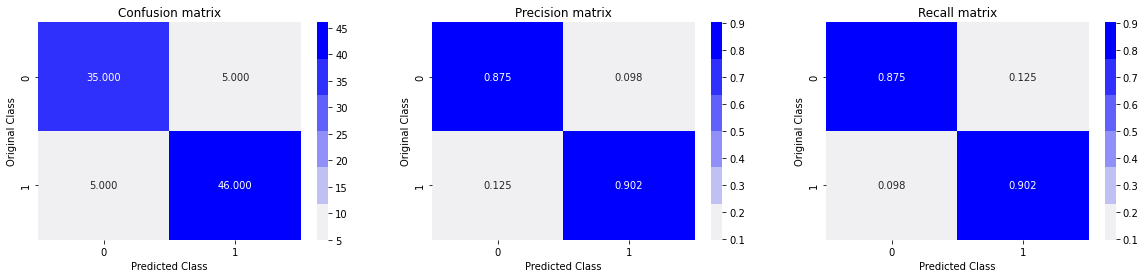

In [88]:
model = xgb.XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
                          colsample_bylevel=None, colsample_bynode=None,
                          colsample_bytree=None, early_stopping_rounds=None,
                          enable_categorical=False, eval_metric=None, feature_types=None,
                          gamma=None, gpu_id=None, grow_policy=None,
                          importance_type=None, interaction_constraints=None,
                          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
                          max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
                          max_leaves=None, min_child_weight=None,
                          monotone_constraints=None, n_estimators=100, n_jobs=None,
                          num_parallel_tree=None)

model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# AdaBoost Using Hyperparameter tuning 

In [77]:
classifier =AdaBoostClassifier()
params = {
            "n_estimators" :np.arange(100,1100,100),
            "learning_rate":[0.1,0.2,0.3,0.4,0.5],

}
model = model_selection.GridSearchCV(estimator=classifier,param_grid = params,cv=10,scoring="accuracy",verbose=10,n_jobs=-1)
model.fit(x_train,y_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy', verbose=10)

In [78]:
model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

Accuarcy in train : 0.8915094339622641
Accuarcy in test : 0.8461538461538461
Precision in train : 0.8699186991869918
Precision in test : 0.8936170212765957
Recall  in train: 0.9385964912280702
Recall  in test: 0.8235294117647058
log loss 5.313701840834072
CVaccuracy in train: 78.76623% (12.96840%)
CVaccuracy in test: 74.66667% (18.67725%)


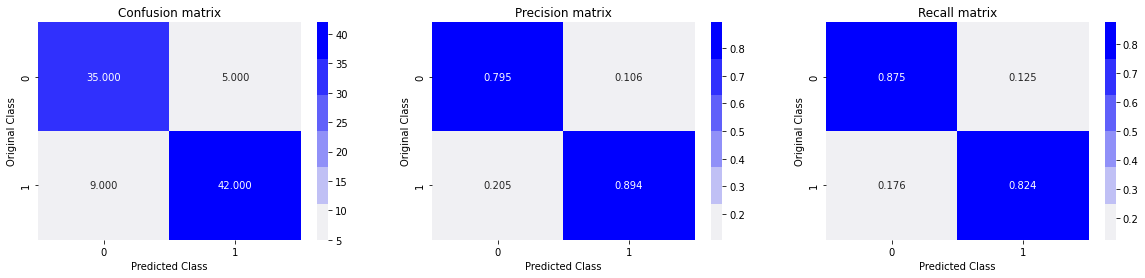

In [79]:

model =AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)

# AdaBoost Using Hyperopt 

Accuarcy in train : 0.8726415094339622
Accuarcy in test : 0.8571428571428571
Precision in train : 0.84251968503937
Precision in test : 0.8958333333333334
Recall  in train: 0.9385964912280702
Recall  in test: 0.8431372549019608
log loss 4.934154847483405
CVaccuracy in train: 78.76623% (12.96840%)
CVaccuracy in test: 74.66667% (18.67725%)


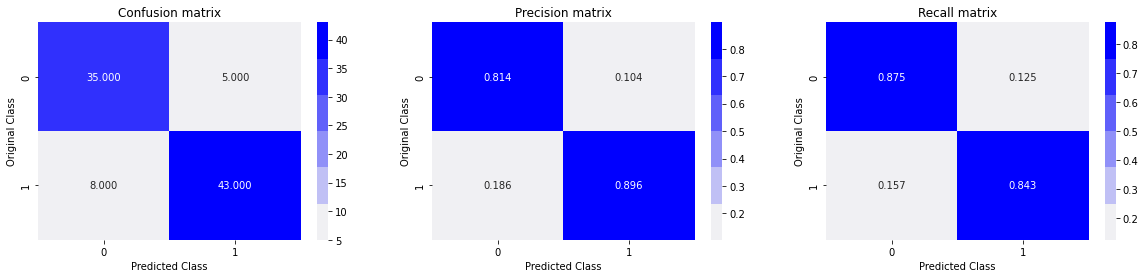

In [80]:
model =AdaBoostClassifier(learning_rate= 0.028896623094475306, n_estimators=557)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('Accuarcy in train :' ,metrics.accuracy_score(y_train,model.predict(x_train)))
print('Accuarcy in test :' ,metrics.accuracy_score(y_test,prediction))

print('Precision in train :', precision_score(y_train, model.predict(x_train)))
print('Precision in test :', precision_score(y_test, prediction))

print('Recall  in train:', recall_score(y_train, model.predict(x_train)))
print('Recall  in test:', recall_score(y_test,prediction))

print('log loss' , metrics.log_loss(y_test, prediction))

results = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring="accuracy")
print("CVaccuracy in train: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

results = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10,scoring="accuracy")
print("CVaccuracy in test: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

plot_confusion_matrix(y_test,prediction)